In [1]:
from modules.utils import sorter, cleaner
from modules.preprocess import loader, sample_print
from modules. evaluation import train_plot
from keras import models, layers, optimizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
[print(cat + " - number of images in directory: " + str(len(os.listdir("data/raw/" + cat)))) for cat in ["pistols","others"]]

pistols - number of images in directory: 7771
others - number of images in directory: 3546


[None, None]

In [3]:
# Use this before pushing to repo
[cleaner(i) for i in ["train","test","validation"]]

[None, None, None]

In [4]:
sorter(3500,1750,1750) 

In [5]:
train = loader("train", augmentation = False, batch_size = 100)

Found 3498 images belonging to 2 classes.


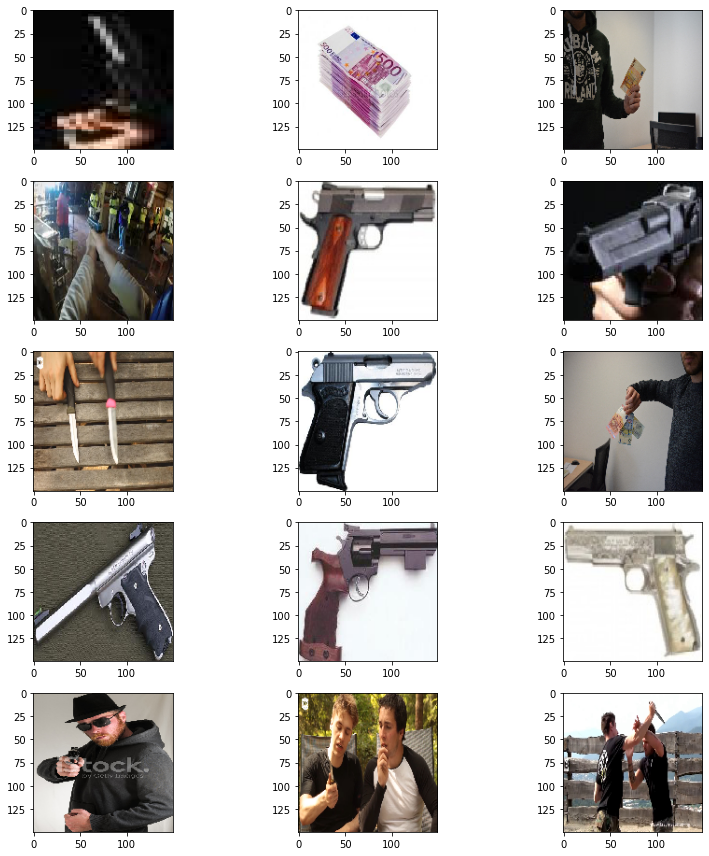

In [6]:
sample_print(train)

In [7]:
val = loader("validation", augmentation=False,batch_size=100)

Found 1750 images belonging to 2 classes.


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape = (150,150,3)))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [9]:
model.compile(loss="binary_crossentropy",optimizer = "adam",metrics=["acc"])

In [14]:
history = model.fit(
    train,
    steps_per_epoch=3498//100,
    epochs = 3,
    validation_data = val,
    validation_steps = 1750//100 
)

Epoch 1/3
34/34 [==============================] - 67s 2s/step - loss: 0.1623 - acc: 0.9479 - val_loss: 0.3970 - val_acc: 0.8176
Epoch 2/3
34/34 [==============================] - 65s 2s/step - loss: 0.0867 - acc: 0.9797 - val_loss: 0.4315 - val_acc: 0.8229
Epoch 3/3
34/34 [==============================] - 66s 2s/step - loss: 0.0446 - acc: 0.9947 - val_loss: 0.4723 - val_acc: 0.8229


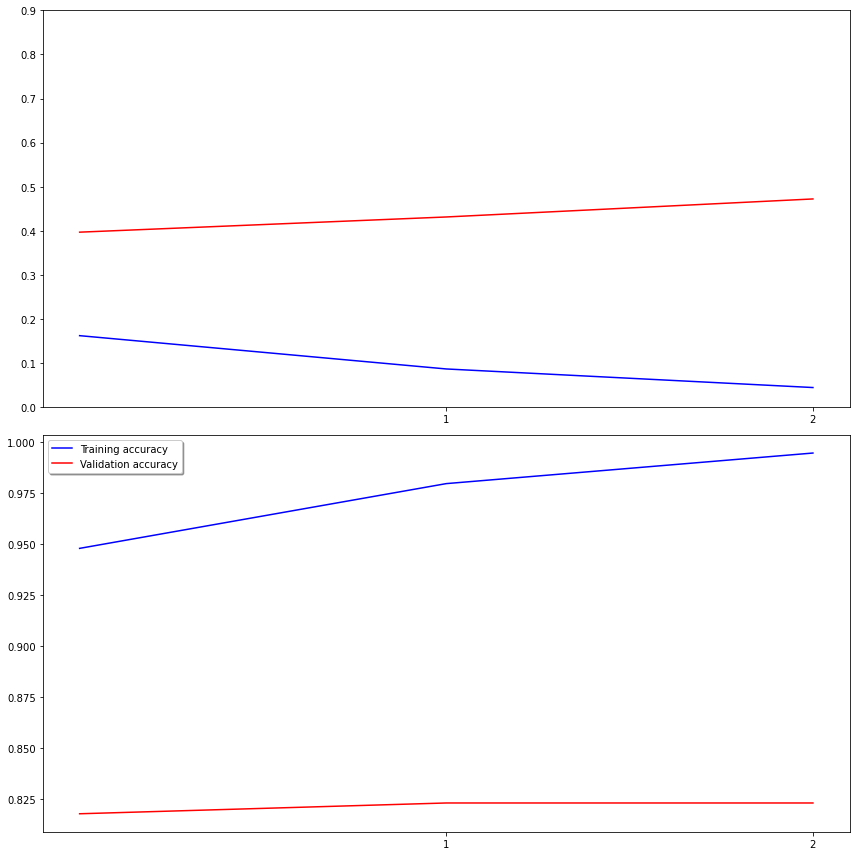

In [15]:
train_plot(history,epochs=3)

In [19]:
train_augmented = loader("train",augmentation=True, batch_size=100, rotation_range=40)

Found 3498 images belonging to 2 classes.


In [20]:
history_aug = model.fit(
    train_augmented,
    steps_per_epoch=3498//100,
    epochs = 3,
    validation_data = val,
    validation_steps = 1750//100 
)

Epoch 1/3
34/34 [==============================] - 60s 2s/step - loss: 0.0273 - acc: 0.9959 - val_loss: 0.6031 - val_acc: 0.8065
Epoch 2/3
34/34 [==============================] - 62s 2s/step - loss: 0.0079 - acc: 1.0000 - val_loss: 0.6012 - val_acc: 0.8171
Epoch 3/3
34/34 [==============================] - 62s 2s/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.6434 - val_acc: 0.8188


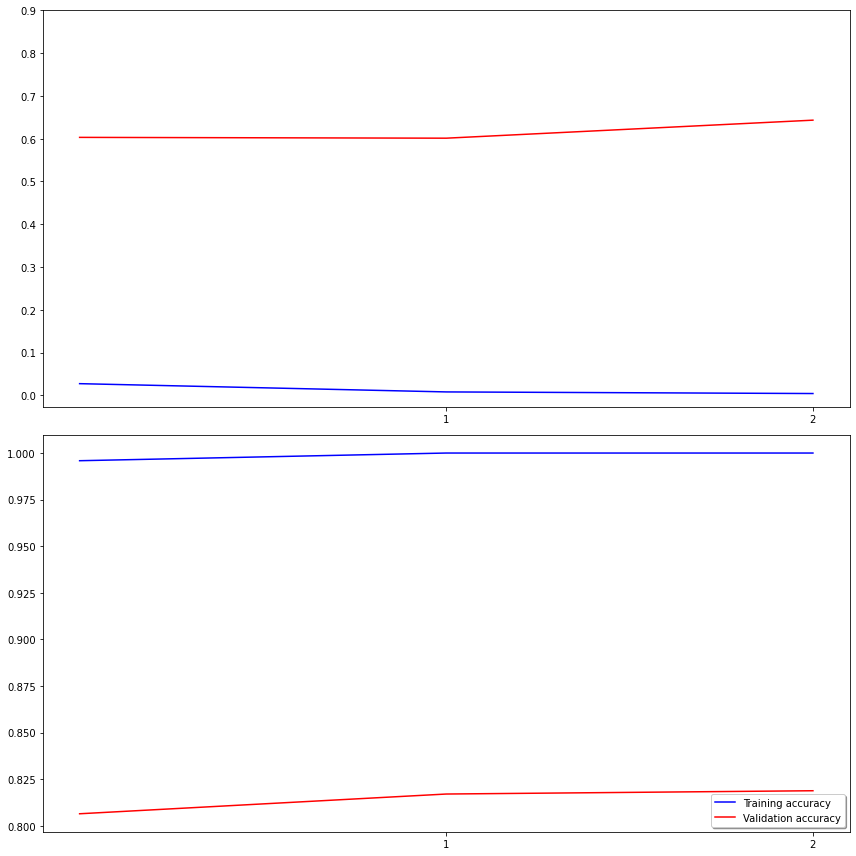

In [21]:
train_plot(history_aug,epochs=3)

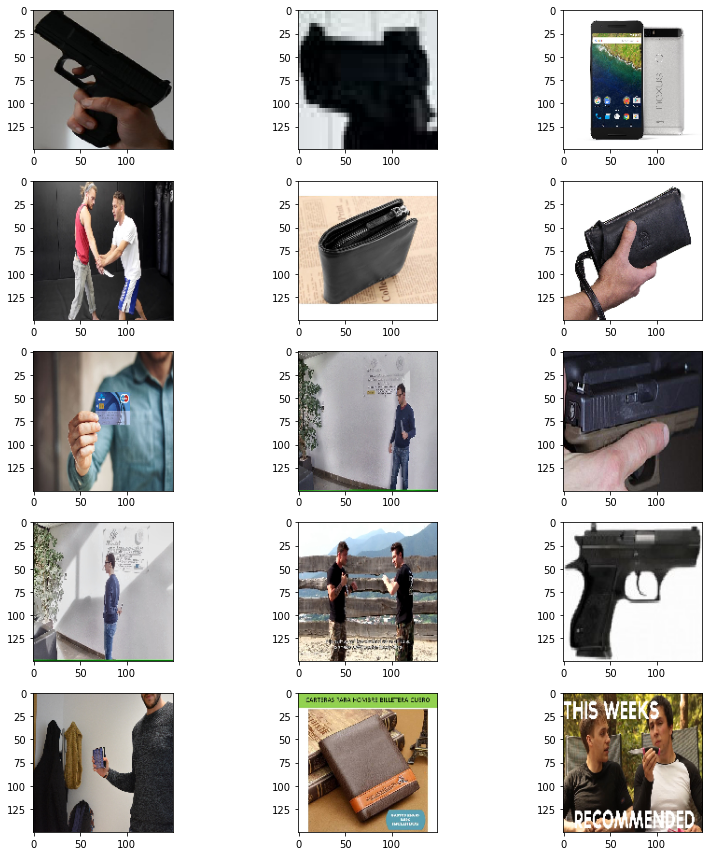

In [24]:
sample_print(train_augmented)

In [34]:
augment_abartı = loader("train",augmentation=True, batch_size=100,
                                   vertical_flip = True)

Found 3498 images belonging to 2 classes.


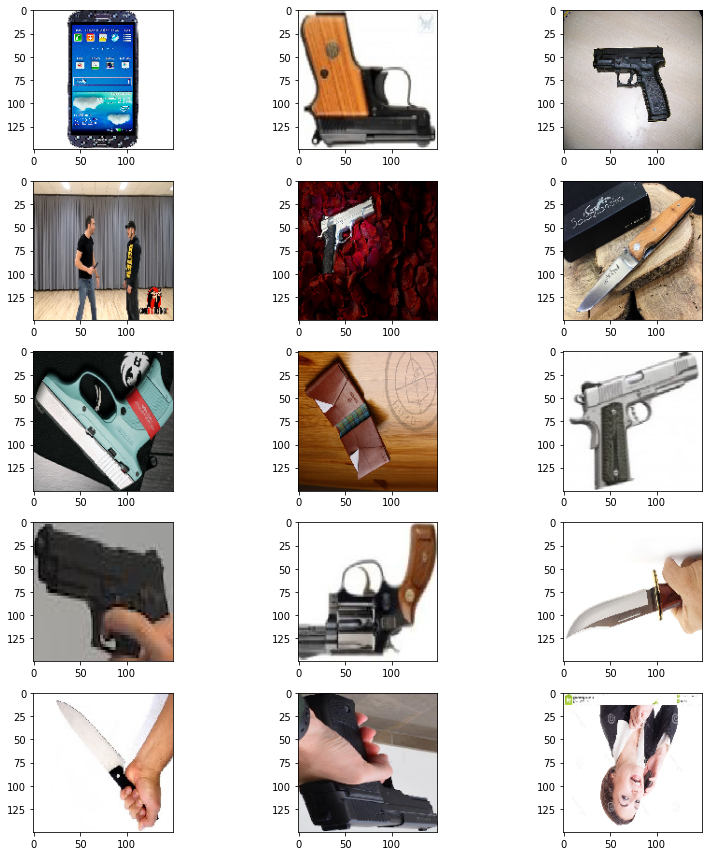

In [35]:
sample_print(augment_abartı)

In [36]:
[cleaner(i) for i in ["train","test","validation"]]

[None, None, None]